Question 1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [4]:

nba = pd.read_csv("nba_2013 (1).csv")

In [8]:
nba.shape

(481, 31)

In [6]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [16]:
nba['bref_team_id'].value_counts()

TOT    63
NOP    18
OKC    17
LAL    16
LAC    16
UTA    16
NYK    15
BRK    15
DAL    15
PHO    15
DET    15
POR    15
HOU    15
ATL    15
MIA    15
BOS    14
WAS    14
SAS    14
CLE    14
MIN    14
ORL    13
MIL    13
CHA    13
MEM    13
IND    12
PHI    12
GSW    12
DEN    12
CHI    11
TOR    10
SAC     9
Name: bref_team_id, dtype: int64

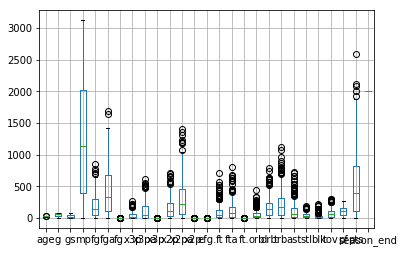

In [17]:
nba.boxplot()

In [23]:
nba.isna().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [24]:
#handling null values
nba['x3p.'].fillna(nba['x3p.'].mean(),inplace=True)
nba['fg.'].fillna(nba['fg.'].mean(),inplace=True)
nba['x2p.'].fillna(nba['x2p.'].mean(),inplace=True)
nba['efg.'].fillna(nba['efg.'].mean(),inplace=True)
nba['ft.'].fillna(nba['ft.'].mean(),inplace=True)

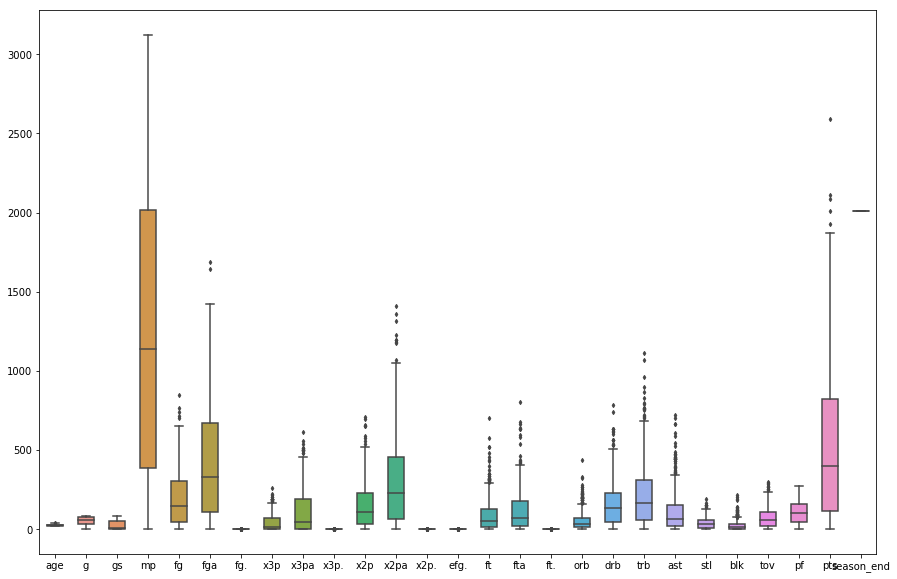

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=nba, width= 0.5,ax=ax,  fliersize=3)

In [36]:
x=nba.drop(columns=['pts','player','pos','bref_team_id','season'])

In [38]:
y=nba['pts']

In [39]:
scalar=StandardScaler()

In [40]:
x_scaled=scalar.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,1.121546,age
1,7.948495,g
2,6.154578,gs
3,43.945569,mp
4,inf,fg
5,inf,fga
6,20.003964,fg.
7,inf,x3p
8,inf,x3pa
9,1.916578,x3p.


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25)

In [44]:
knn=KNeighborsRegressor()

In [46]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [47]:
knn.score(x_train,y_train)

0.9774854705710081

In [48]:
knn.score(x_test,y_test)

0.9537071605565137

In [49]:
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(x_scaled)

12

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from statistics import mean
knn2=KNeighborsRegressor(algorithm='ball_tree',leaf_size=18,n_neighbors=5)
cnt=0
count=[]
train_score=[]
test_score=[]

for train_index,test_index in kfold.split(x_scaled):
    x_train,x_test=x_scaled[train_index],x_scaled[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    knn2.fit(x_train,y_train)
    train_score_=knn2.score(x_train,y_train)
    test_score_=knn2.score(x_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    print("for k = ",cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))
    

for k =  1
train_score is :   0.9750738441177164 and test score is :   0.9658550273721808
for k =  2
train_score is :   0.9784775996903777 and test score is :   0.9641741476618744
for k =  3
train_score is :   0.9766737067054764 and test score is :   0.9604348585070599
for k =  4
train_score is :   0.9771216554361184 and test score is :   0.9439947476753586
for k =  5
train_score is :   0.9778200614857369 and test score is :   0.9665546796800853
for k =  6
train_score is :   0.9763784535489869 and test score is :   0.9676176022574212
for k =  7
train_score is :   0.9768681235403036 and test score is :   0.9605870618366735
for k =  8
train_score is :   0.9761959072870416 and test score is :   0.9763823131781385
for k =  9
train_score is :   0.9768312408889576 and test score is :   0.968400036480229
for k =  10
train_score is :   0.9775896446281059 and test score is :   0.940331185664229
for k =  11
train_score is :   0.9765567476924509 and test score is :   0.9750969526284989
for k =  1

Question 2

In this assignment students have to find the frequency of words in a
webpage. User can use urllib and BeautifulSoup to extract text from
webpage.
Hint:
from bs4 import BeautifulSoup
import urllib.request
import nltk
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
2.3. Problem

In [64]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
import requests
#response = urllib.request.urlopen('http://php.net/')
#html = response.read()
r=requests.get('http://php.net/')
soup = BeautifulSoup(r.content)

In [66]:
soup

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>PHP: Hypertext Preprocessor</title>
<link href="https://www.php.net/favicon.ico" rel="shortcut icon"/>
<link href="http://php.net/phpnetimprovedsearch.src" rel="search" title="Add PHP.net search" type="application/opensearchdescription+xml"/>
<link href="https://www.php.net/releases/feed.php" rel="alternate" title="PHP Release feed" type="application/atom+xml"/>
<link href="https://www.php.net/feed.atom" rel="alternate" title="PHP: Hypertext Preprocessor" type="application/atom+xml"/>
<link href="https://www.php.net/index.php" rel="canonical"/>
<link href="https://www.php.net/index" rel="shorturl"/>
<link href="https://www.php.net/index" hreflang="x-default" rel="alternate"/>
<link href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen" rel="stylesheet" type="text/css"/>
<link href="/cached.

In [82]:
text = (''.join(s.findAll(text=True))for s in soup.findAll('p'))

In [83]:
sent=list(text)


In [84]:
sent

['PHP is a popular general-purpose scripting language that is especially suited to web development.',
 'Fast, flexible and pragmatic, PHP powers everything from your blog to the most popular websites in the world.',
 'The PHP development team announces the immediate availability of PHP\n     7.4.6. This is a security release which also contains several bug fixes.',
 'All PHP 7.4 users are encouraged to upgrade to this version.',
 'For source downloads of PHP 7.4.6 please visit our downloads page,\n     Windows source and binaries can be found on windows.php.net/download/.\n     The list of changes is recorded in the ChangeLog.\n     ',
 'The PHP development team announces the immediate availability of PHP\n      7.3.18 This is a security release which also contains several bug fixes.',
 'All PHP 7.3 users are encouraged to upgrade to this version.',
 'For source downloads of PHP 7.3.18 please visit our downloads page,\n      Windows source and binaries can be found on windows.php.net/d

In [59]:
soup.select('div')

[<div class="navbar-inner clearfix">
     <a class="brand" href="/"><img alt="php" height="24" src="/images/logos/php-logo.svg" width="48"/></a>
     <div id="mainmenu-toggle-overlay"></div>
     <input id="mainmenu-toggle" type="checkbox"/>
     <ul class="nav">
       <li class=""><a href="/downloads">Downloads</a></li>
       <li class=""><a href="/docs.php">Documentation</a></li>
       <li class=""><a href="/get-involved">Get Involved</a></li>
       <li class=""><a href="/support">Help</a></li>
     </ul>
     <form action="/search.php" class="navbar-search" id="topsearch">
       <input name="show" type="hidden" value="quickref"/>
       <input accesskey="s" class="search-query" name="pattern" placeholder="Search" type="search"/>
     </form>
   </div>,
 <div id="mainmenu-toggle-overlay"></div>,
 <div id="flash-message"></div>,
 <div><dl>
 <dt><a href="/manual/en/getting-started.php">Getting Started</a></dt>
 	<dd><a href="/manual/en/introduction.php">Introduction</a></dd>
 	<dd

In [104]:
words=[]
for i in range(0,len(sent)):
    word=sent[i].split(" ")
    words.append(word)
    

In [106]:
words

[['PHP',
  'is',
  'a',
  'popular',
  'general-purpose',
  'scripting',
  'language',
  'that',
  'is',
  'especially',
  'suited',
  'to',
  'web',
  'development.'],
 ['Fast,',
  'flexible',
  'and',
  'pragmatic,',
  'PHP',
  'powers',
  'everything',
  'from',
  'your',
  'blog',
  'to',
  'the',
  'most',
  'popular',
  'websites',
  'in',
  'the',
  'world.'],
 ['The',
  'PHP',
  'development',
  'team',
  'announces',
  'the',
  'immediate',
  'availability',
  'of',
  'PHP\n',
  '',
  '',
  '',
  '',
  '7.4.6.',
  'This',
  'is',
  'a',
  'security',
  'release',
  'which',
  'also',
  'contains',
  'several',
  'bug',
  'fixes.'],
 ['All',
  'PHP',
  '7.4',
  'users',
  'are',
  'encouraged',
  'to',
  'upgrade',
  'to',
  'this',
  'version.'],
 ['For',
  'source',
  'downloads',
  'of',
  'PHP',
  '7.4.6',
  'please',
  'visit',
  'our',
  'downloads',
  'page,\n',
  '',
  '',
  '',
  '',
  'Windows',
  'source',
  'and',
  'binaries',
  'can',
  'be',
  'found',
  'on',
  

In [146]:
#removing blank spaces
for j in words:
    po=j.count('')
    for i in range(0,po):
        j.remove('')

In [147]:
#removing blank spaces
for j in words:
    po=j.count('\n')
    for i in range(0,po):
        j.remove('\n')

In [149]:
#converting list to dataframe
df=pd.DataFrame(words)

In [156]:
#counting using funtion
y=df.stack().value_counts()

In [158]:
print(y)

the               307
PHP               211
of                136
release           134
in                121
can               114
for               114
be                109
The               107
found             104
and                93
the\n              87
is                 83
on                 81
For                67
you                60
or                 55
this               50
to                 47
source             44
downloads          44
version            43
list               42
also               39
a                  38
visit              37
team               37
please             37
bug                35
read               35
                 ... 
Entries             1
3.                  1
7.3.0alpha4.\n      1
30th.\n             1
7.3.0RC4.\n         1
\nSocial            1
7.2.31              1
7.4.0RC4.           1
websites            1
Events              1
pragmatic,          1
\n\t                1
language            1
flexible            1
News      

In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.
The raw image is available in spicy.misc package with the name face.
Hint:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc

In [160]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc

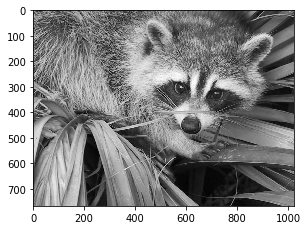

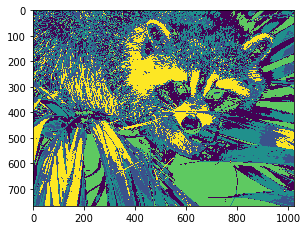

In [161]:
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the gray scale image

f = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 3.6))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

# Compressing the gray scale image into 5 clusters

rows = f.shape[0]
cols = f.shape[1]

#print(rows,cols)

image = f.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

clusters = np.asarray(kmeans.cluster_centers_) 
labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols); 
 
#np.save('codebook_racoon.npy',clusters)
plt.imsave('compressed_racoon.png',labels);

# Visualize the compressed image

image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 3.6))
plt.imshow(image)
plt.show()

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns

In [188]:
data = sns.load_dataset("iris")

In [189]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c = ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica'].

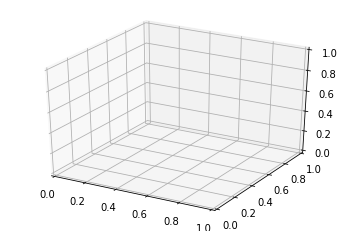

In [196]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data[data.columns[0]],data[data.columns[1]],data[data.columns[2]],c=data[data.columns[4]],s=data[data.columns[3]])
ax.view_init(30,185)
plt.show()

In [171]:
data.feature_names[0]

'sepal length (cm)'

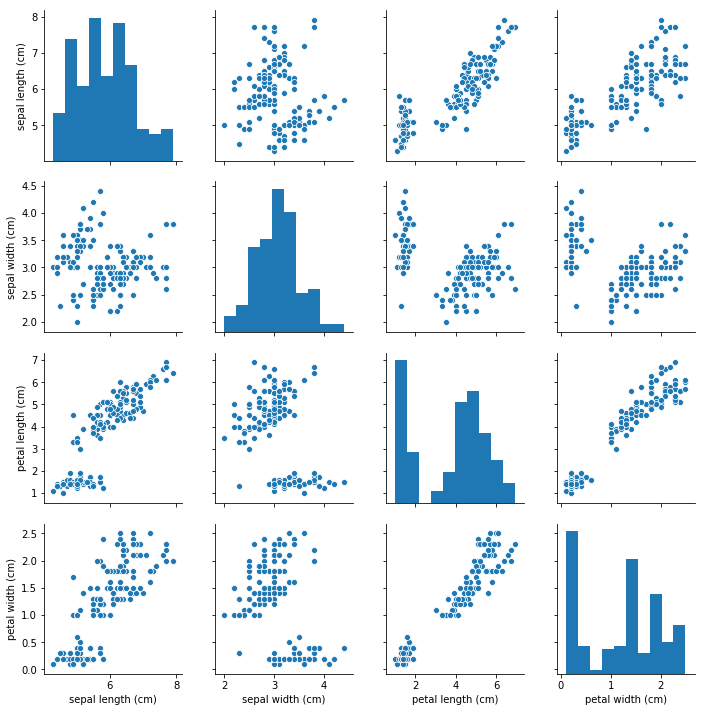

In [181]:
sns.pairplot(df,hue=)

In [191]:
data.columns[0]

'sepal_length'

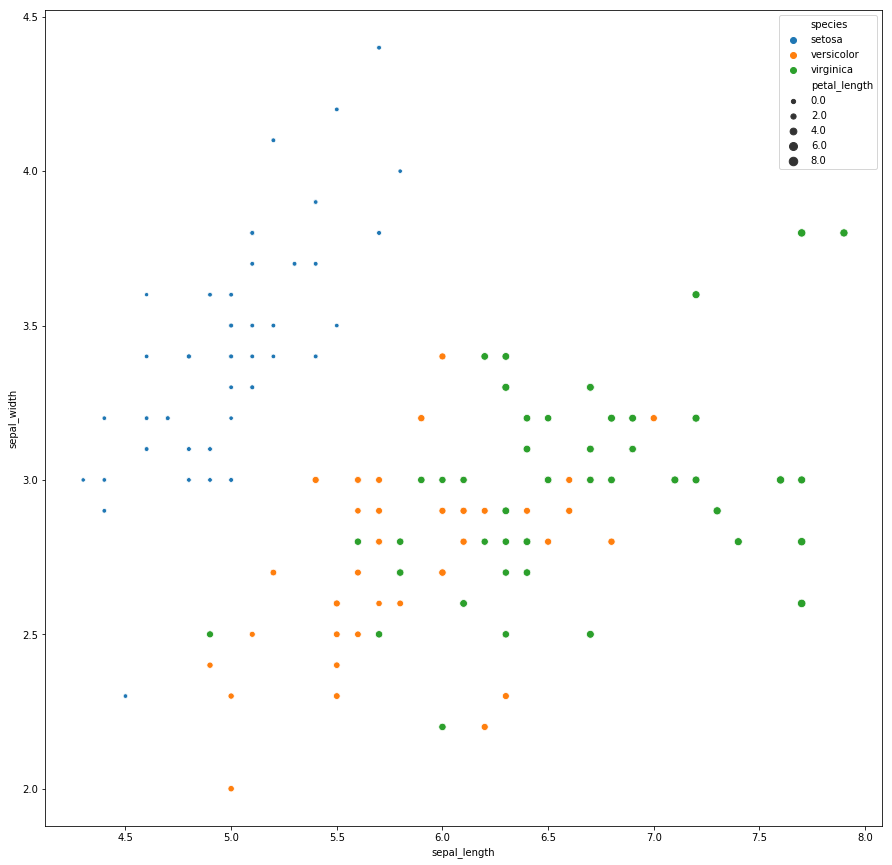

In [199]:
fig_dims = (15, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(ax=ax,x=data[data.columns[0]],y=data[data.columns[1]],size=data[data.columns[2]],hue=data[data.columns[4]])